<a href="https://colab.research.google.com/github/Diksha-Bora/Data-Science-project/blob/main/Naive_bayes12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAIVE BAYES CLASSIFICATION 


In [298]:
# IMPORTING REQUIRED LIBRARIES 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [299]:
data = pd.read_csv("/content/adult.csv",header = None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [300]:
data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [301]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [302]:
# DATA PREPROCESSING 
new_col = []
for i in range (len(data.columns)):
  new_col.append(("col_"+str(i)))
new_col 

['col_0',
 'col_1',
 'col_2',
 'col_3',
 'col_4',
 'col_5',
 'col_6',
 'col_7',
 'col_8',
 'col_9',
 'col_10',
 'col_11',
 'col_12',
 'col_13',
 'col_14']

In [303]:
data.columns = new_col
data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


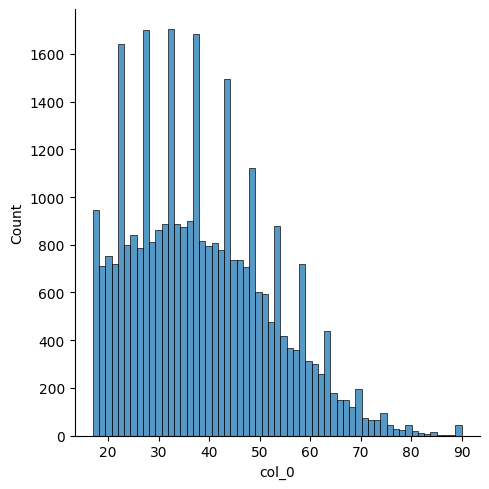

In [304]:
# DATA VISUALIZATION
sns.displot(data,x="col_0")

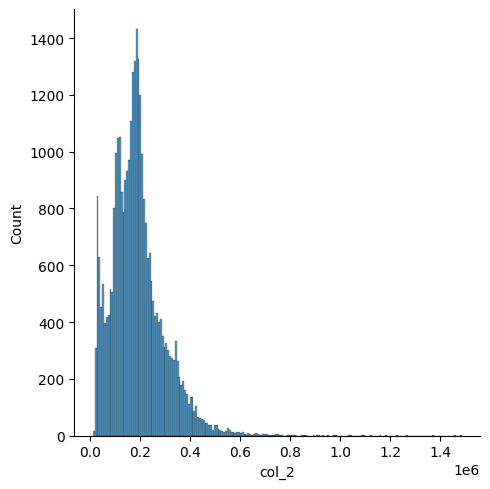

In [305]:
sns.displot(data,x="col_2")

In [306]:
data['col_14']=data["col_14"].apply(lambda x: x.strip())
data['col_14'].unique()

array(['<=50K', '>50K'], dtype=object)

<Axes: xlabel='col_14', ylabel='count'>

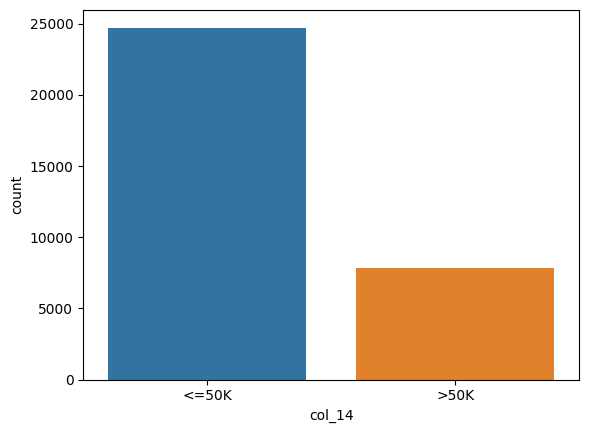

In [307]:
sns.countplot(data,x="col_14")

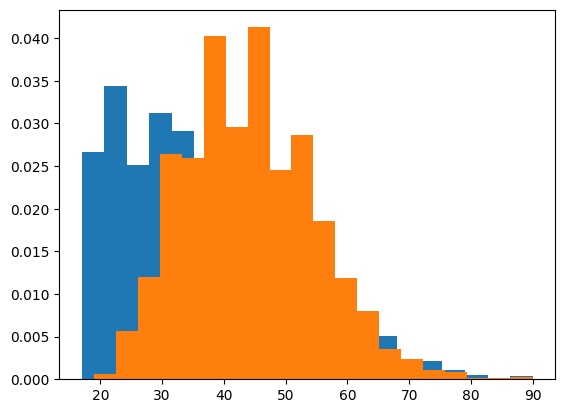

In [308]:
plt.hist(data = data[data["col_14"] == "<=50K"],x="col_0",density = True ,bins =20)
plt.hist(data = data[data["col_14"] == ">50K"], x="col_0" , density =True , bins =20)
plt.show()

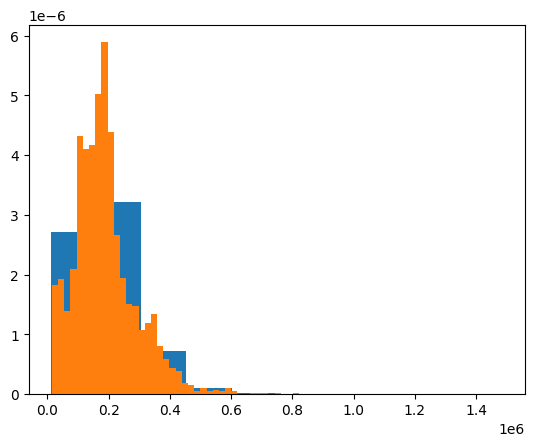

In [309]:
plt.hist(data = data[data["col_14"]=="<=50K"], x = "col_2", density= True )
plt.hist(data = data[data["col_14"]==">50K"], x = "col_2", density= True , bins =60)
plt.show()

<Axes: xlabel='col_4', ylabel='count'>

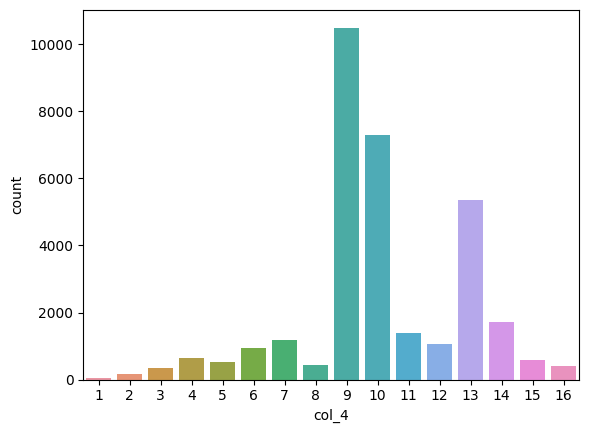

In [310]:
sns.countplot(data,x="col_4")

In [311]:
data["col_10"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: col_10, Length: 119, dtype: int64

In [312]:
data["col_11"].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: col_11, Length: 92, dtype: int64

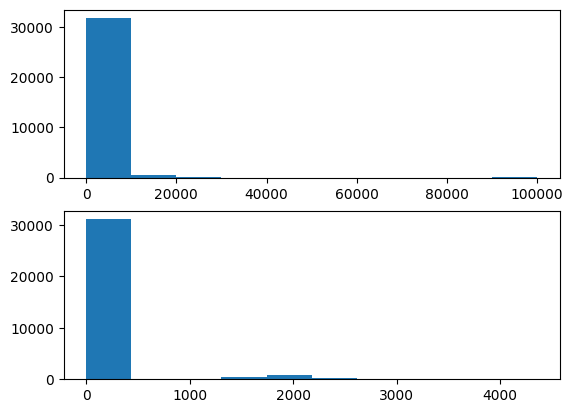

In [313]:
plt.subplot(2,1,1)
plt.hist(data=data, x="col_10")
plt.subplot(2,1,2)
plt.hist(data=data,x ="col_11")
plt.show()

In [314]:
data =data.drop(["col_10","col_11"],axis = 1)
data.isnull().sum()

col_0     0
col_1     0
col_2     0
col_3     0
col_4     0
col_5     0
col_6     0
col_7     0
col_8     0
col_9     0
col_12    0
col_13    0
col_14    0
dtype: int64

In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col_0   32561 non-null  int64 
 1   col_1   32561 non-null  object
 2   col_2   32561 non-null  int64 
 3   col_3   32561 non-null  object
 4   col_4   32561 non-null  int64 
 5   col_5   32561 non-null  object
 6   col_6   32561 non-null  object
 7   col_7   32561 non-null  object
 8   col_8   32561 non-null  object
 9   col_9   32561 non-null  object
 10  col_12  32561 non-null  int64 
 11  col_13  32561 non-null  object
 12  col_14  32561 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [316]:
# DATA PREPROCESSING 
categorical_data = []
numerical_data = []
for col in data.columns:
  if(data[col].dtype=="int"):
    numerical_data.append(col)
  else:
    categorical_data.append(col)
print(categorical_data)    
print(numerical_data)

['col_1', 'col_3', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_13', 'col_14']
['col_0', 'col_2', 'col_4', 'col_12']


In [317]:
from sklearn.preprocessing import LabelEncoder
for i in categorical_data:
  label_encoder = LabelEncoder() 
  encoded_label = label_encoder.fit_transform(data[i])
  data[i+"_encoded"] = encoded_label

In [318]:
data = data.drop(categorical_data,axis = 1)
data.head()

,col_0,col_2,col_4,col_12,col_1_encoded,col_3_encoded,col_5_encoded,col_6_encoded,col_7_encoded,col_8_encoded,col_9_encoded,col_13_encoded,col_14_encoded
0,39,77516,13,40,7,9,4,1,1,4,1,39,0
1,50,83311,13,13,6,9,2,4,0,4,1,39,0
2,38,215646,9,40,4,11,0,6,1,4,1,39,0
3,53,234721,7,40,4,1,2,6,0,2,1,39,0
4,28,338409,13,40,4,9,2,10,5,2,0,5,0


In [319]:
input = data.drop("col_14_encoded",axis=1)
output = data["col_14_encoded"]

In [320]:
# SPLITTING DATASET INTO TRAIN AND TEST 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.2,random_state=40,stratify=data["col_14_encoded"])

In [321]:
# MODEL SELECTION AND EXECUTION 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [322]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

In [330]:
# MODEL EVALUATION USING METRICS 
from sklearn.metrics import classification_report,confusion_matrix,f1_score
print("TRAIN")
print(classification_report(y_train,y_pred_train))
print("confusion_matrix is:\n",confusion_matrix(y_train,y_pred_train))
print("f1_score is:",f1_score(y_train,y_pred_train))
print("\nTEST")
print(classification_report(y_test,y_pred_test))
print("confusion_matrix is:\n",confusion_matrix(y_test,y_pred_test))
print("f1_score is:",f1_score(y_test,y_pred_test))

TRAIN
              precision    recall  f1-score   support

           0       0.82      0.94      0.87     19775
           1       0.64      0.35      0.45      6273

    accuracy                           0.80     26048
   macro avg       0.73      0.64      0.66     26048
weighted avg       0.78      0.80      0.77     26048

confusion_matrix is:
 [[18509  1266]
 [ 4059  2214]]
f1_score is: 0.45401414949246394

TEST
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      4945
           1       0.63      0.34      0.44      1568

    accuracy                           0.79      6513
   macro avg       0.72      0.64      0.66      6513
weighted avg       0.77      0.79      0.77      6513

confusion_matrix is:
 [[4636  309]
 [1040  528]]
f1_score is: 0.43908523908523905
